In [ ]:
!pip install mne
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter #untuk filtering

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
#Load data EEG dari file EDF
data1 = "/content/drive/MyDrive/TA/EDF/chb01_03 (1).edf"
data1 = mne.io.read_raw_edf(data1) #membaca raw data
data1

# mengambil data dari objek raw
data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names



Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb01_03 (1).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-1703043106.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(data1) #membaca raw data


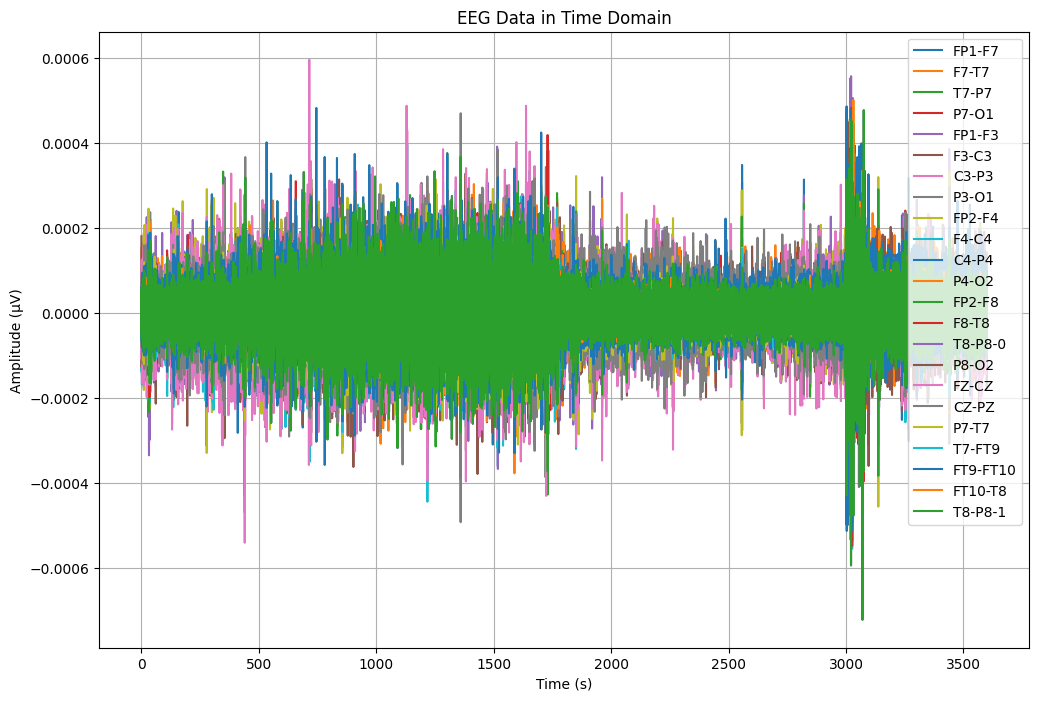

              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0      -1.777778e-05  3.926740e-05 -3.711844e-06  8.400488e-06 -5.860806e-07   
1       1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
2       1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
3       5.860806e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
4       1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
...              ...           ...           ...           ...           ...   
921595 -3.379731e-05 -3.965812e-05  6.349206e-05  2.363858e-05  1.504274e-05   
921596 -2.754579e-05 -2.676435e-05  6.505495e-05  1.035409e-05  2.285714e-05   
921597 -1.777778e-05 -2.324786e-05  5.919414e-05  1.465201e-05  3.418803e-05   
921598 -8.791209e-06 -2.246642e-05  6.036630e-05  1.191697e-05  4.239316e-05   
921599 -4.884005e-06 -2.051282e-05  5.919414e-05  1.387057e-05  4.395604e-05   

               F3-C3         C3-P3     

In [ ]:
# Ekstrak data dan simpan ke DataFrame pandas
# data di transpose, nama kolomnya ambil dari nama channel
df1 = pd.DataFrame(data.T, columns=channel_names)
df1['Time'] = times #Menambahkan kolom baru bernama "Time" ke DataFrame.

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df1['Time']

# Plot data EEG mentah
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right') #legend ditaruh di pojok kanan atas.
plt.grid(True)
plt.show()

print(df1)

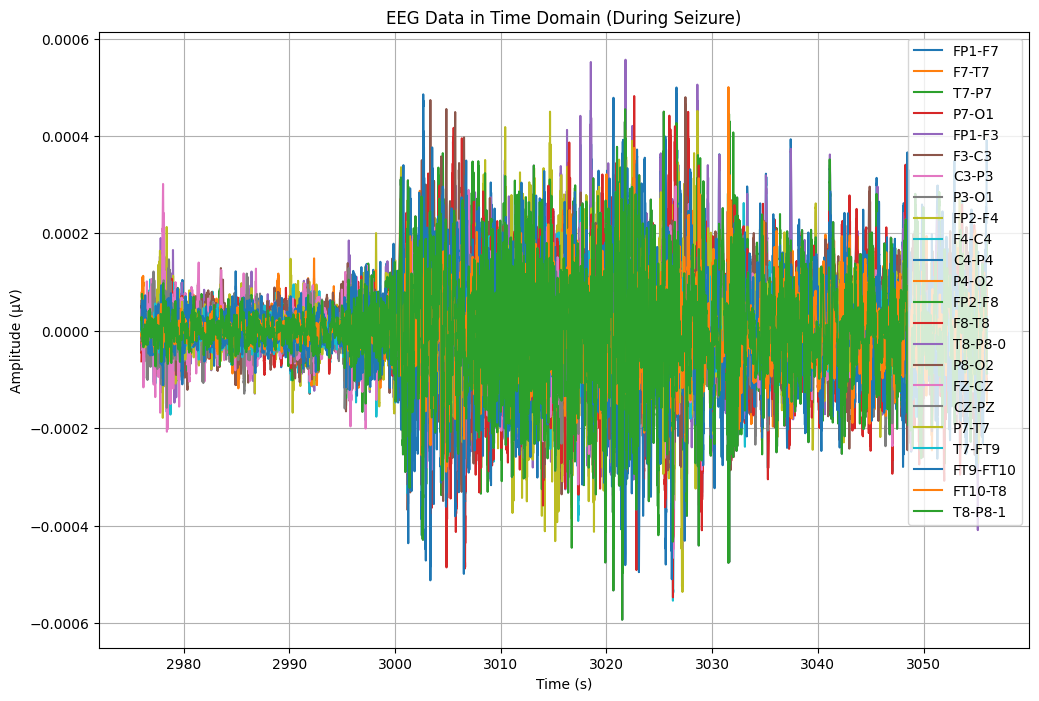

Data berhasil disimpan dalam file CSV:           FP1-F7     F7-T7     T7-P7         P7-O1    FP1-F3     F3-C3  \
761856 -0.000023 -0.000026  0.000008  2.148962e-06 -0.000004  0.000004   
761857 -0.000031 -0.000024  0.000010  1.953602e-07 -0.000013  0.000004   
761858 -0.000033 -0.000020  0.000009 -4.884005e-06 -0.000017  0.000005   
761859 -0.000032 -0.000022  0.000007 -3.711844e-06 -0.000021  0.000004   
761860 -0.000030 -0.000023  0.000003 -2.148962e-06 -0.000022  0.000001   
...          ...       ...       ...           ...       ...       ...   
782331 -0.000027 -0.000012  0.000045  3.711844e-06 -0.000004 -0.000078   
782332 -0.000020  0.000013  0.000025 -1.973138e-05  0.000002 -0.000066   
782333 -0.000008 -0.000003  0.000018 -2.207570e-05  0.000008 -0.000061   
782334 -0.000012  0.000018 -0.000007 -2.520147e-05  0.000008 -0.000057   
782335 -0.000012  0.000016 -0.000019 -2.559219e-05  0.000002 -0.000057   

               C3-P3     P3-O1    FP2-F4     F4-C4  ...   T8-P8-0     P8

In [ ]:
# frekuensi sampling
sample_rate = 256

# rentang waktu yang akan dipotong
start_time_seconds = 2976
end_time_seconds = 3056

# Potong data berdasarkan waktu
start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_1 = df1.iloc[start_index:end_index]

# Mengambil data waktu dari kolom 'Time'
time = df_1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_1.columns:
        plt.plot(time, df_1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Menyimpan data yang sudah di potong
df_1.to_csv("/content/drive/MyDrive/TA/SAMPEL/chb01_03.csv", index=False)

print(f"Data berhasil disimpan dalam file CSV: {df_1}")

In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 2996:
        return "tidak kejang"
    elif 2996 <= row['Time'] < 3036:
        return "kejang"
    else:
        return "tidak kejang"

df_1['seizure'] = df_1.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
df_1.to_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv", index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {df_1}")


Data yang sudah diberi label berhasil disimpan dalam file CSV:           FP1-F7     F7-T7     T7-P7         P7-O1    FP1-F3     F3-C3  \
761856 -0.000023 -0.000026  0.000008  2.148962e-06 -0.000004  0.000004   
761857 -0.000031 -0.000024  0.000010  1.953602e-07 -0.000013  0.000004   
761858 -0.000033 -0.000020  0.000009 -4.884005e-06 -0.000017  0.000005   
761859 -0.000032 -0.000022  0.000007 -3.711844e-06 -0.000021  0.000004   
761860 -0.000030 -0.000023  0.000003 -2.148962e-06 -0.000022  0.000001   
...          ...       ...       ...           ...       ...       ...   
782331 -0.000027 -0.000012  0.000045  3.711844e-06 -0.000004 -0.000078   
782332 -0.000020  0.000013  0.000025 -1.973138e-05  0.000002 -0.000066   
782333 -0.000008 -0.000003  0.000018 -2.207570e-05  0.000008 -0.000061   
782334 -0.000012  0.000018 -0.000007 -2.520147e-05  0.000008 -0.000057   
782335 -0.000012  0.000016 -0.000019 -2.559219e-05  0.000002 -0.000057   

               C3-P3     P3-O1    FP2-F4     F4-

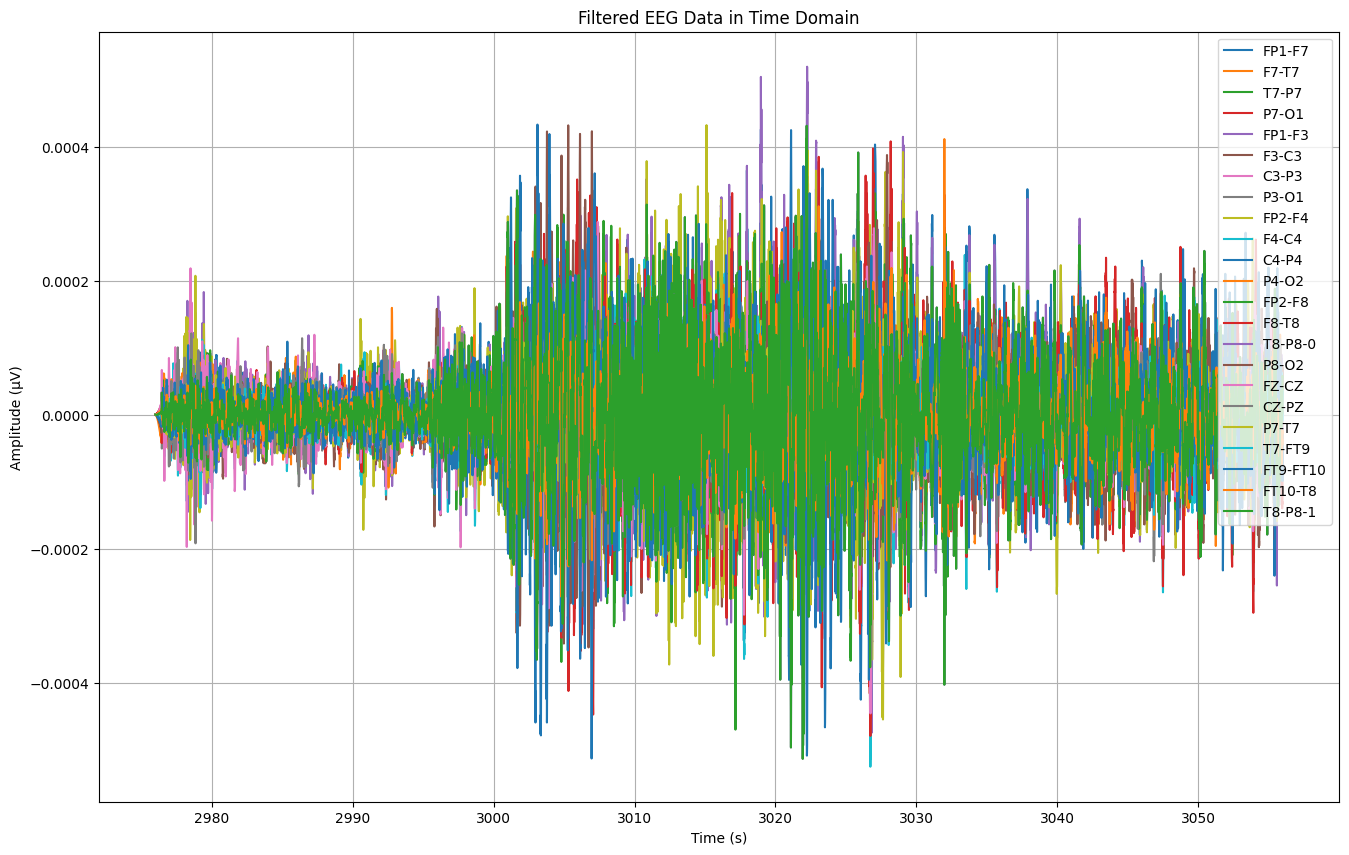

Data setelah filtering berhasil disimpan dalam file CSV:              FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0     -2.764572e-08 -3.142633e-08  9.215240e-09  2.599170e-09 -5.434629e-09   
1     -7.172847e-08 -6.688358e-08  2.280681e-08  3.403354e-09 -2.292593e-08   
2     -5.095880e-08 -1.854338e-08  1.343730e-08 -8.940749e-09 -3.347835e-08   
3      5.163101e-08  8.381644e-08 -2.321421e-08 -2.051309e-08 -1.120180e-08   
4      1.519692e-07  1.321668e-07 -5.864423e-08 -6.966116e-09  3.418928e-08   
...             ...           ...           ...           ...           ...   
20475 -3.127644e-05 -6.557955e-05 -3.068925e-05  1.967192e-05 -2.865466e-05   
20476 -4.499612e-05 -7.551486e-05 -1.744156e-05  3.465438e-05 -4.204591e-05   
20477 -5.577184e-05 -7.830949e-05 -1.625031e-06  3.478670e-05 -4.667721e-05   
20478 -5.298884e-05 -7.181589e-05  8.877108e-06  2.047418e-05 -3.558248e-05   
20479 -3.835695e-05 -5.859516e-05  7.478266e-06  3.839419e-06 -1.508122e-0

In [ ]:
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='boxcar')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 230


eeg_columns = df_1.columns[:-2]  # ambil semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # ubah DataFrame menjadi NumPy array.

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns) # mengubah jadi dataframe
TA1['Time'] = df_1['Time'].values # menambahkan kolom time
TA1['seizure'] = df_1['seizure'] # menambahkan kolom seizure

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING chb01_03.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")



#SAMPEL 1 (chb01_03)

In [ ]:
import pandas as pd

# Import data filtering
df = pd.read_csv("/content/drive/MyDrive/TA/FILTERING/chb01_03.csv")

# Memisahkan data berdasarkan label
TA1 = df[df['seizure'] == 'kejang']
TA2 = df[df['seizure'] == 'tidak kejang']

# Menampilkan jumlah data di masing-masing kategori
print("Jumlah data kejang:", len(TA1))
print("Jumlah data tidak kejang:", len(TA2))

# Menyimpan data ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/KEJANG/chb01_03.csv", index=False)
TA2.to_csv("/content/drive/MyDrive/TA/NO KEJANG/chb01_03.csv", index=False)


Jumlah data kejang: 10240
Jumlah data tidak kejang: 10240


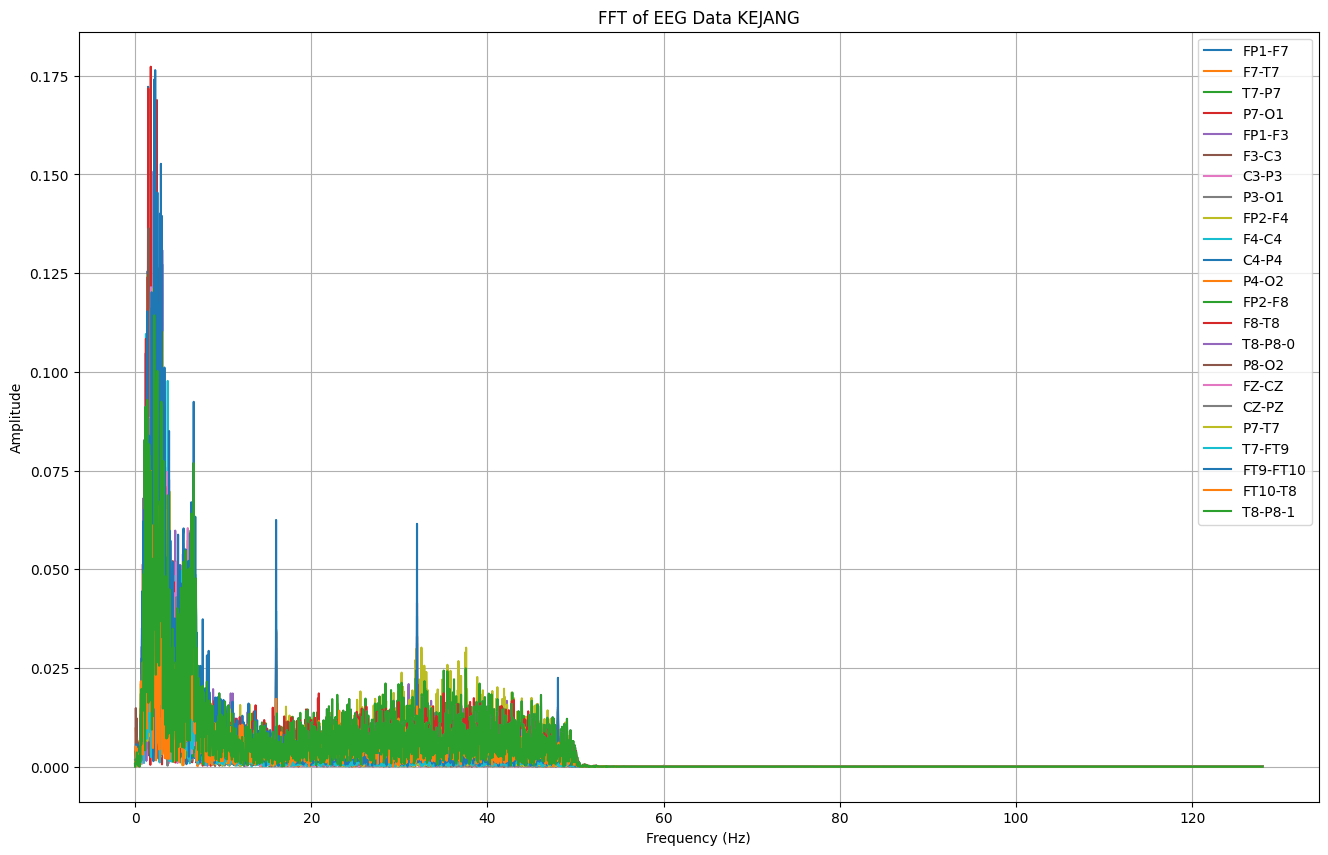

Data setelah FFT berhasil disimpan dalam file CSV:         FP1-F7     F7-T7         T7-P7     P7-O1    FP1-F3     F3-C3  \
0     0.001195  0.001793  5.203514e-04  0.002409  0.001823  0.000805   
1     0.000789  0.001850  1.575254e-04  0.001468  0.001465  0.000763   
2     0.002511  0.002253  5.931243e-04  0.001467  0.003102  0.001204   
3     0.003001  0.002348  1.485357e-03  0.002485  0.004089  0.001443   
4     0.001659  0.000911  1.209551e-03  0.002071  0.000594  0.001194   
...        ...       ...           ...       ...       ...       ...   
5115  0.000047  0.000022  4.569972e-07  0.000015  0.000023  0.000053   
5116  0.000047  0.000022  4.525363e-07  0.000015  0.000023  0.000053   
5117  0.000047  0.000022  4.535862e-07  0.000015  0.000023  0.000053   
5118  0.000047  0.000022  4.541193e-07  0.000015  0.000023  0.000053   
5119  0.000047  0.000022  4.532494e-07  0.000015  0.000023  0.000053   

         C3-P3     P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ  \
0     0.000

In [ ]:
TA1 = pd.read_csv("/content/drive/MyDrive/TA/KEJANG/chb01_03.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = [] #list kosong
for channel in channels: # jalanin per channel EEG
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals) #masukkan hasil FFT ke list

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T #sebelumnya baris itu channel, kolom itu frekuensi
TA_1.columns = channels
TA_1['seizure'] = TA1['seizure']
TA_1['frekuensi'] = fft_freqs  # Masukkan frekuensi sebagai kolom pertama


# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data KEJANG setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/KEJANG/chb01_03.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

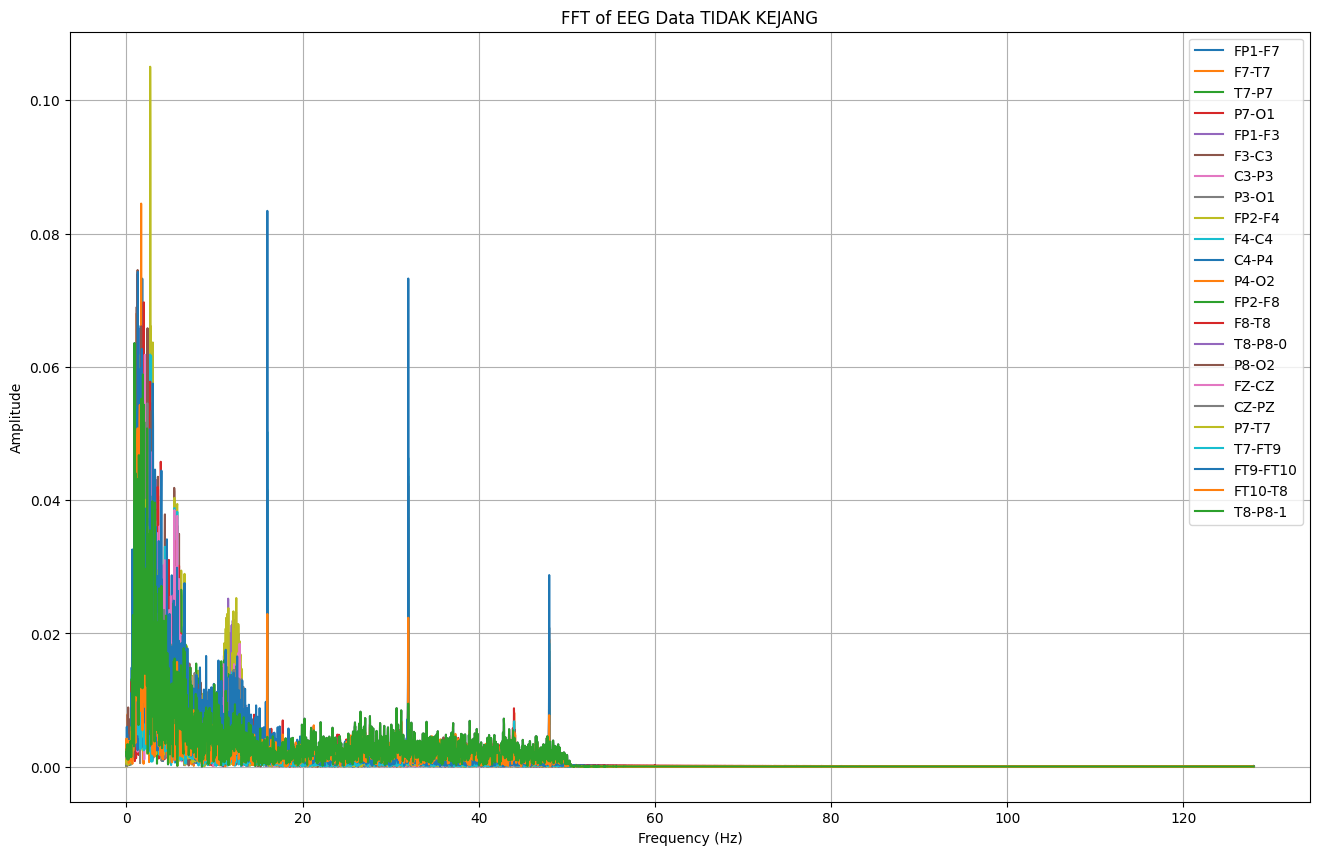

Data setelah FFT berhasil disimpan dalam file CSV:         FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3  \
0     0.002151  0.002534  0.001093  0.001818  0.003076  0.002220   
1     0.001725  0.002208  0.001228  0.001983  0.002685  0.000397   
2     0.001701  0.001330  0.000571  0.002346  0.002361  0.001105   
3     0.003392  0.002494  0.001399  0.002131  0.004251  0.000943   
4     0.000109  0.002613  0.000964  0.001868  0.001310  0.001004   
...        ...       ...       ...       ...       ...       ...   
5115  0.000062  0.000048  0.000002  0.000013  0.000021  0.000084   
5116  0.000033  0.000003  0.000001  0.000016  0.000025  0.000023   
5117  0.000062  0.000048  0.000002  0.000013  0.000021  0.000084   
5118  0.000033  0.000003  0.000001  0.000016  0.000025  0.000023   
5119  0.000062  0.000048  0.000002  0.000013  0.000021  0.000084   

             C3-P3         P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ  \
0     9.996301e-05  1.239747e-03  0.000051  0.00325

In [ ]:
TA2 = pd.read_csv("/content/drive/MyDrive/TA/NO KEJANG/chb01_03.csv")

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
sampling_rate = 256

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA2.columns:
        signal = TA2[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_2 = pd.DataFrame(fft_features).T
TA_2.columns = channels
TA_2['seizure'] = TA2['seizure']
TA_2['frekuensi'] = fft_freqs

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_2.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA2[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data TIDAK KEJANG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data TIDAK KEJANG setelah FFT ke file CSV
TA_2.to_csv("/content/drive/MyDrive/TA/NO KEJANG/chb01_03.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_2}")


Data berhasil digabung dan disimpan sebagai df_gabungan.csv!
Jumlah data seizure dan tidak seizure:
seizure
kejang          5120
tidak kejang    5120
Name: count, dtype: int64


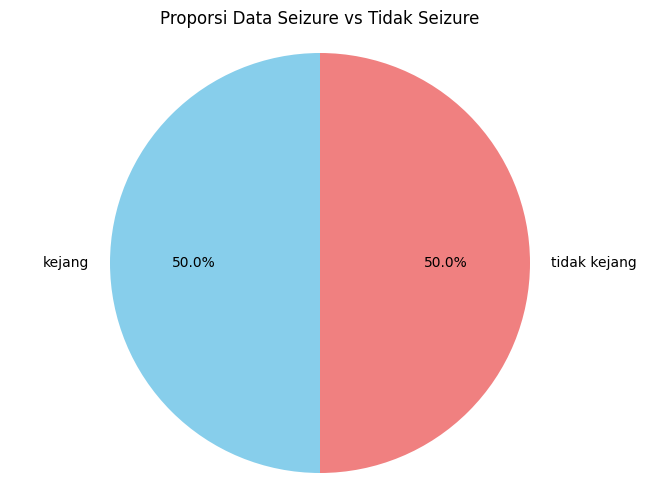

In [ ]:
# Menggabungkan data KEJANG & TIDAK KEJANG
TA_gabungan = pd.concat([TA_1, TA_2], ignore_index=True)

# Menyimpan kembali data gabungan ke file CSV
TA_gabungan.to_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv", index=False)

print("Data berhasil digabung dan disimpan sebagai df_gabungan.csv!")

# Menghitung jumlah masing-masing label (seizure dan tidak seizure)
seizure_counts = TA_gabungan['seizure'].value_counts()

# Menampilkan jumlah data seizure dan tidak seizure
print("Jumlah data seizure dan tidak seizure:")
print(seizure_counts)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporsi Data Seizure vs Tidak Seizure')
plt.axis('equal')  # Menjaga proporsi lingkaran tetap
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np

FFT = pd.read_csv("/content/drive/MyDrive/TA/FFT BLACKMAN DONE/chb01_03.csv")
FFT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.003741,0.000385,0.000622,0.000638,0.002700,0.000573,0.000365,0.001750,0.002275,0.001656,...,0.001062,0.000140,0.001181,0.000622,0.000367,0.002299,0.000212,0.002336,kejang,0.000
1,0.003742,0.000385,0.000623,0.000638,0.002700,0.000573,0.000367,0.001751,0.002276,0.001656,...,0.001062,0.000141,0.001181,0.000623,0.000367,0.002300,0.000213,0.002337,kejang,0.025
2,0.003744,0.000384,0.000625,0.000640,0.002701,0.000573,0.000373,0.001754,0.002277,0.001657,...,0.001062,0.000142,0.001182,0.000625,0.000369,0.002301,0.000216,0.002339,kejang,0.050
3,0.003746,0.000383,0.000628,0.000641,0.002702,0.000573,0.000383,0.001759,0.002280,0.001659,...,0.001060,0.000144,0.001184,0.000628,0.000372,0.002303,0.000223,0.002343,kejang,0.075
4,0.003749,0.000381,0.000633,0.000644,0.002702,0.000572,0.000396,0.001766,0.002282,0.001662,...,0.001063,0.000146,0.001186,0.000633,0.000376,0.002304,0.000231,0.002348,kejang,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.000011,0.000026,0.000042,0.000007,0.000024,0.000057,0.000042,0.000009,0.000104,0.000065,...,0.000066,0.000017,0.000015,0.000042,0.000017,0.000144,0.000032,0.000029,tidak kejang,127.875
10236,0.000065,0.000032,0.000038,0.000033,0.000016,0.000059,0.000063,0.000032,0.000015,0.000043,...,0.000015,0.000027,0.000052,0.000038,0.000014,0.000046,0.000014,0.000011,tidak kejang,127.900
10237,0.000011,0.000026,0.000042,0.000007,0.000024,0.000057,0.000042,0.000009,0.000104,0.000065,...,0.000066,0.000017,0.000015,0.000042,0.000017,0.000144,0.000032,0.000029,tidak kejang,127.925
10238,0.000065,0.000032,0.000038,0.000033,0.000016,0.000059,0.000063,0.000032,0.000015,0.000043,...,0.000015,0.000027,0.000052,0.000038,0.000014,0.000046,0.000014,0.000011,tidak kejang,127.950


# GRID RECTANGULAR FFT (skema baru) stratify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH KEJANG DAN TIDAK KEJANG.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
best_model = RandomForestClassifier(**best_params, random_state=42) #parameter dimasukkan secara dinamis dari dictionary.

# Latih ulang model terbaik di data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9721    0.8005    0.8780   1122816
tidak kejang     0.8305    0.9771    0.8978   1122816

    accuracy                         0.8888   2245632
   macro avg     0.9013    0.8888    0.8879   2245632
weighted avg     0.9013    0.8888    0.8879   2245632



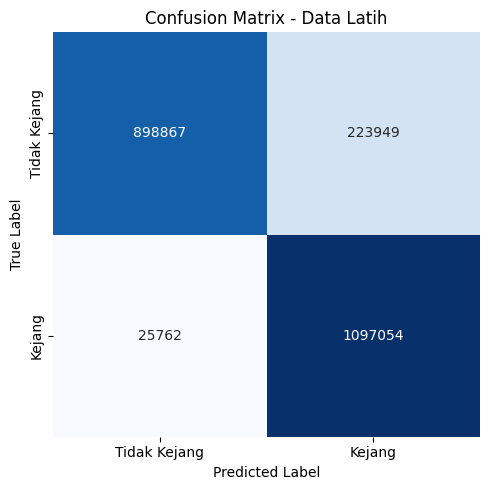

In [ ]:
# Prediksi data latih
y_train_pred = best_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9278    0.7748    0.8444    280704
tidak kejang     0.8067    0.9397    0.8681    280704

    accuracy                         0.8573    561408
   macro avg     0.8673    0.8573    0.8563    561408
weighted avg     0.8673    0.8573    0.8563    561408



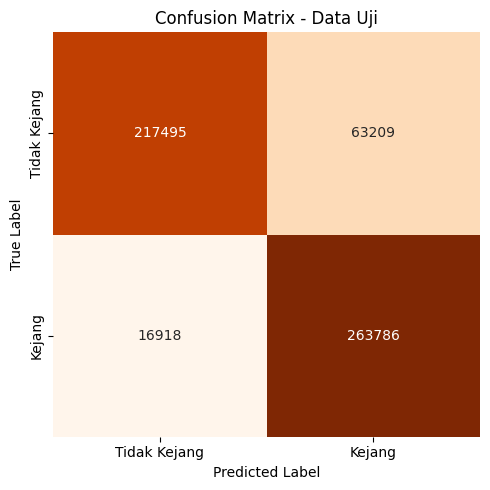

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

In [ ]:
# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_) # cv_results_ atribut bawaan yang otomatis tersedia setelah kamu menjalankan fit()

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False) # nilai tertinggi ke terendah

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.857068                1
{'max_depth': 10, 'n_estimators': 100}         0.766282                2
 {'max_depth': 5, 'n_estimators': 100}         0.663299                3


# yang lainya

Rata-rata Amplitudo Delta (Kejang): 1.4333
Rata-rata Amplitudo Theta (Kejang): 0.7667
Rata-rata Amplitudo Alpha (Kejang): 0.4090
Rata-rata Amplitudo Beta (Kejang): 0.2265
Rata-rata Amplitudo Gamma (Kejang): 0.1467
Rata-rata Amplitudo Delta (Normal): 0.6358
Rata-rata Amplitudo Theta (Normal): 0.2751
Rata-rata Amplitudo Alpha (Normal): 0.1463
Rata-rata Amplitudo Beta (Normal): 0.1085
Rata-rata Amplitudo Gamma (Normal): 0.0902


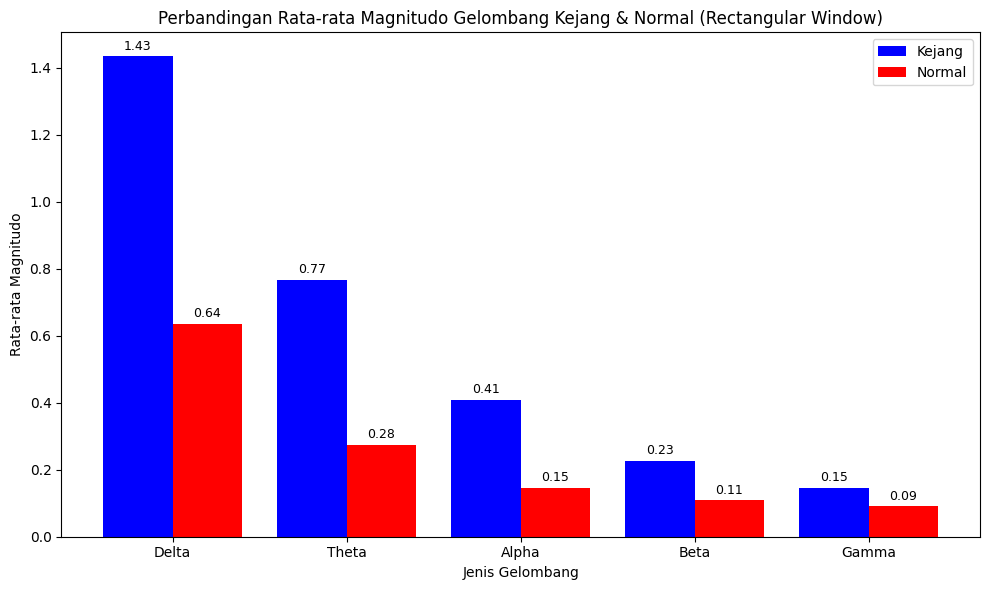

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_mean(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.mean(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai rata-rata untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_mean1 = {band: get_band_mean(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_mean2 = {band: get_band_mean(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, mean_val in band_mean1.items():
    print(f"Rata-rata Amplitudo {band} (Kejang): {mean_val:.4f}")
for band, mean_val in band_mean2.items():
    print(f"Rata-rata Amplitudo {band} (Normal): {mean_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
means_kejang = list(band_mean1.values())
means_normal = list(band_mean2.values())

# Plot bar
bars1 = plt.bar(index, means_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, means_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(means_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(means_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Rata-rata Magnitudo")
plt.title("Perbandingan Rata-rata Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Maksimum Delta (Kejang): 9.5909
Nilai Maksimum Theta (Kejang): 7.1768
Nilai Maksimum Alpha (Kejang): 3.0841
Nilai Maksimum Beta (Kejang): 1.7883
Nilai Maksimum Gamma (Kejang): 1.4260
Nilai Maksimum Delta (Normal): 3.2319
Nilai Maksimum Theta (Normal): 1.5448
Nilai Maksimum Alpha (Normal): 0.9621
Nilai Maksimum Beta (Normal): 0.8806
Nilai Maksimum Gamma (Normal): 0.9284


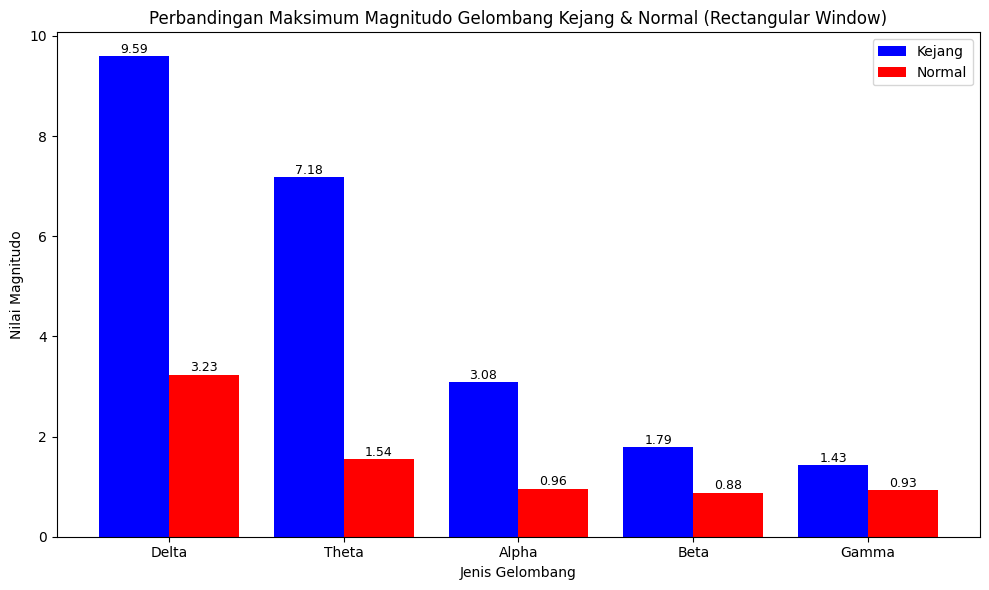

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_max(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.max(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai maksimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_max1 = {band: get_band_max(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_max2 = {band: get_band_max(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, max_val in band_max1.items():
    print(f"Nilai Maksimum {band} (Kejang): {max_val:.4f}")
for band, max_val in band_max2.items():
    print(f"Nilai Maksimum {band} (Normal): {max_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
max_kejang = list(band_max1.values())
max_normal = list(band_max2.values())

# Plot bar
bars1 = plt.bar(index, max_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, max_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai rata-rata di atas bar
for i, val in enumerate(max_kejang):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(max_normal):
    plt.text(i + bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Maksimum Magnitudo")
plt.title("Perbandingan Maksimum Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Nilai Minimum Delta (Kejang): 0.0313
Nilai Minimum Theta (Kejang): 0.0345
Nilai Minimum Alpha (Kejang): 0.0163
Nilai Minimum Beta (Kejang): 0.0064
Nilai Minimum Gamma (Kejang): 0.0014
Nilai Minimum Delta (Normal): 0.0351
Nilai Minimum Theta (Normal): 0.0241
Nilai Minimum Alpha (Normal): 0.0116
Nilai Minimum Beta (Normal): 0.0050
Nilai Minimum Gamma (Normal): 0.0012


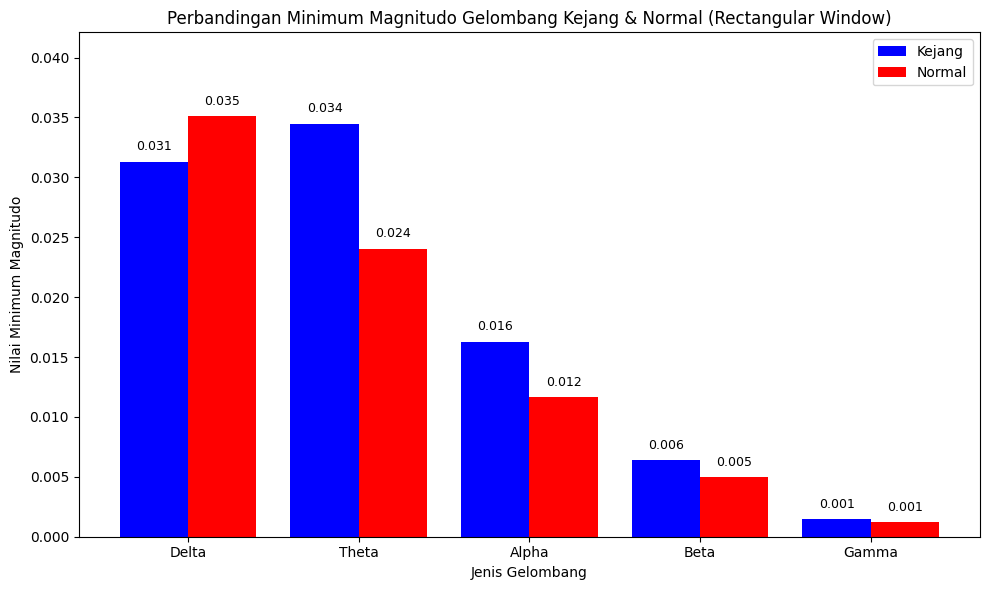

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_min(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.min(amplitudes[mask]) if np.any(mask) else 0

# Menghitung nilai minimum untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_min1 = {band: get_band_min(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_min2 = {band: get_band_min(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, min_val in band_min1.items():
    print(f"Nilai Minimum {band} (Kejang): {min_val:.4f}")
for band, min_val in band_min2.items():
    print(f"Nilai Minimum {band} (Normal): {min_val:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Data bar
min_kejang = list(band_min1.values())
min_normal = list(band_min2.values())

# Hitung batas atas untuk sumbu Y (10% lebih tinggi dari nilai tertinggi)
max_val = max(max(min_kejang), max(min_normal))
plt.ylim(0, max_val * 1.2)  # Tambah ruang agar teks tidak keluar

# Plot bar
bars1 = plt.bar(index, min_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, min_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai di atas bar
for i, val in enumerate(min_kejang):
    plt.text(i, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(min_normal):
    plt.text(i + bar_width, val + max_val * 0.02, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Label dan layout
plt.xlabel("Jenis Gelombang")
plt.ylabel("Nilai Minimum Magnitudo")
plt.title("Perbandingan Minimum Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()



Energi Delta (Kejang): 130064.0236
Energi Theta (Kejang): 54820.2787
Energi Alpha (Kejang): 19730.7025
Energi Beta (Kejang): 19635.0117
Energi Gamma (Kejang): 10113.4104
Energi Delta (Normal): 20275.2054
Energi Theta (Normal): 5054.3484
Energi Alpha (Normal): 1729.4434
Energi Beta (Normal): 3525.4265
Energi Gamma (Normal): 3465.8850


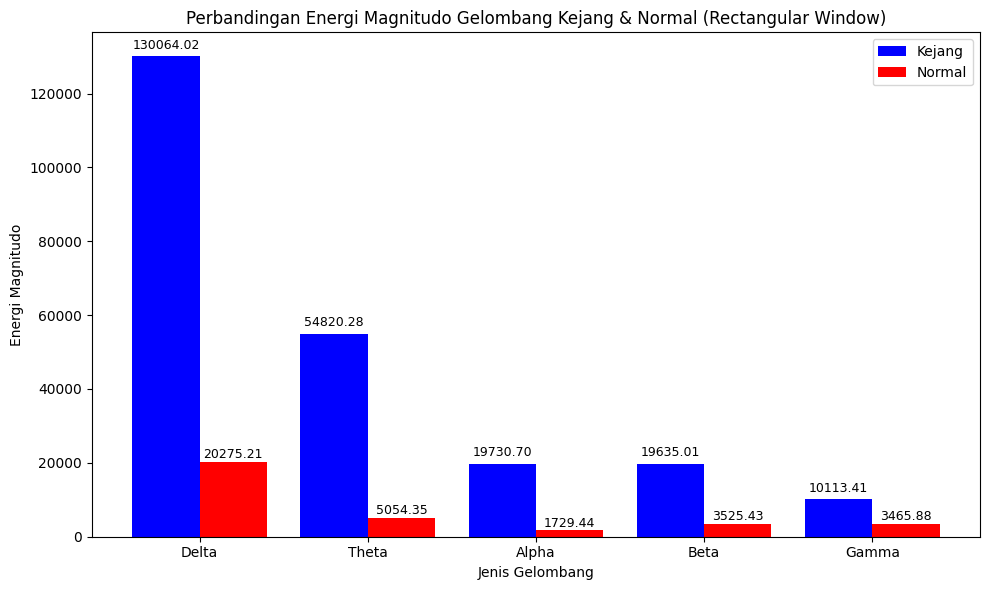

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data 1
file_path1 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (KEJANG).csv"
data1 = pd.read_csv(file_path1)

# Load data 2
file_path2 = "/content/drive/MyDrive/TA/RECTANGULAR BALANCE FFT YANG DIPISAH (NO KEJANG).csv"
data2 = pd.read_csv(file_path2)

# Pastikan kolom yang berisi frekuensi dan amplitudo sesuai dengan dataset Anda
frequencies1 = data1['frekuensi']
frequencies2 = data2['frekuensi']

# Daftar channel EEG
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
            'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
            'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Definisikan rentang frekuensi masing-masing gelombang
bands = {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

def get_band_energy(frequencies, amplitudes, band):
    mask = (frequencies >= band[0]) & (frequencies < band[1])
    return np.sum(amplitudes[mask]**2)  # Menghitung energi

# Menghitung energi untuk masing-masing gelombang secara keseluruhan (tidak dipisah per channel)
total_amplitudes1 = data1[channels].sum(axis=1)
total_amplitudes2 = data2[channels].sum(axis=1)

band_energies1 = {band: get_band_energy(frequencies1, total_amplitudes1, bands[band]) for band in bands}
band_energies2 = {band: get_band_energy(frequencies2, total_amplitudes2, bands[band]) for band in bands}

# Tampilkan hasil
for band, energy in band_energies1.items():
    print(f"Energi {band} (Kejang): {energy:.4f}")
for band, energy in band_energies2.items():
    print(f"Energi {band} (Normal): {energy:.4f}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(bands))

# Ambil nilai energi dalam list
energi_kejang = list(band_energies1.values())
energi_normal = list(band_energies2.values())

# Plot bar
bars1 = plt.bar(index, energi_kejang, bar_width, label='Kejang', color='blue')
bars2 = plt.bar(index + bar_width, energi_normal, bar_width, label='Normal', color='red')

# Tambahkan nilai energi di atas bar
for i, val in enumerate(energi_kejang):
    plt.text(i, val + max(energi_kejang)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(energi_normal):
    plt.text(i + bar_width, val + max(energi_normal)*0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Label dan tampilan
plt.xlabel("Jenis Gelombang")
plt.ylabel("Energi Magnitudo")
plt.title("Perbandingan Energi Magnitudo Gelombang Kejang & Normal (Rectangular Window)")
plt.xticks(index + bar_width / 2, bands.keys())
plt.legend()
plt.tight_layout()
plt.show()
